In [ ]:
"""
Purpose: To look at the initial stats of the 
graph from autoproofreading


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/meshAfterParty")
sys.path.append("/meshAfterParty/meshAfterParty/graph/")

In [3]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-03-11 07:25:03,089 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-11 07:25:03,091 - settings - Setting database.user to celiib
INFO - 2021-03-11 07:25:03,092 - settings - Setting database.password to newceliipass
INFO - 2021-03-11 07:25:03,096 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-03-11 07:25:03,097 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-11 07:25:03,111 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-03-11 07:25:03,465 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-11 07:25:03,468 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-11 07:25:03,469 - settings - Setting database.user to celiib
INFO - 2021-03-11 07:25:03,469 - settings - Setting database.password to newceliipass
INFO - 2021-03-11 07:25:03,470 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-11 07:25:03,471 - settings - Setting database.user to celiib
INFO - 2021-03-11 07:25:03,472 - settings - Setting database.password to newceliipass
INFO - 2021-03-11 07:25:03,473 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-11 07:25:03,843 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-11 07:25:03,879 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-11 07:25:03,880 - settings - Setting database.user to celiib
INFO - 2021-03-11 07:25:03,881 - settings - Setting database.pa

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx_utils as xu
import numpy_utils as nu
from importlib import reload
import system_utils as su
from tqdm_utils import tqdm
from pathlib import Path

In [5]:
import graph_visualizations as gviz
import graph_analysis as ga

# Getting the Statistics on the Initial Graph

In [8]:
G_orig_path = Path("/neuron_mesh_tools/Graph_Analysis/G_orig_multi_di.pbz2")
G_orig_path.exists()

True

In [9]:
if G_orig_path.exists():
    print(f"Loading original graph from saved file")
    G_orig_multi_di = su.decompress_pickle(G_orig_path)
else:
    orig_presyn,orig_postsyn = (du.m65mat.NucleusSynapse() & "presyn != postsyn").fetch("presyn","postsyn")
    original_edges = np.vstack([orig_presyn,orig_postsyn]).T
    G_orig_multi_di = nx.MultiDiGraph()
    _ = G_orig_multi_di.add_edges_from(original_edges)
    su.compressed_pickle(G_orig_multi_di,G_orig_path)

Loading original graph from saved file


# a) Original Graph (Directed and Multi-Graph)

Stats for Original Graph (Multi-Edge,Diretional)
Number of Nodes = 91,565
Number of Edges = 17,133,898
Original Graph (Multi-Edge,Diretional) in_and_out degree distribution mean = 339.1879109179317,
Original Graph (Multi-Edge,Diretional) in_and_out degree distribution median = 201.0


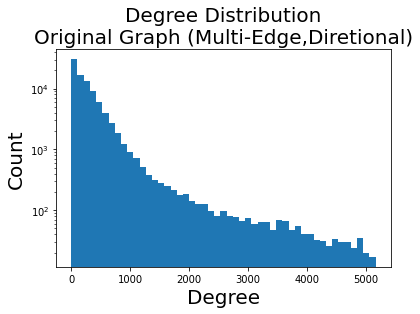

Original Graph (Multi-Edge,Diretional) in degree distribution mean = 175.91157649796392,
Original Graph (Multi-Edge,Diretional) in degree distribution median = 123.0


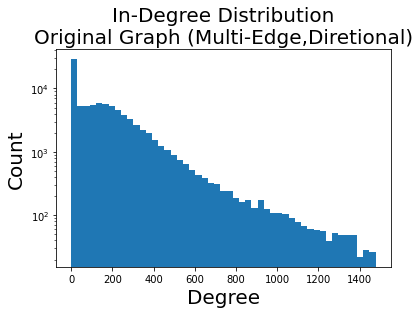

Original Graph (Multi-Edge,Diretional) out degree distribution mean = 158.71759579395655,
Original Graph (Multi-Edge,Diretional) out degree distribution median = 57.0


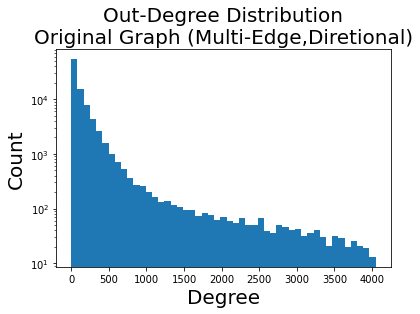

Cant perform connected component analysis


In [10]:
graph_title = "Original Graph (Multi-Edge,Diretional)"
G_orig_multi_di_stats = ga.graph_analysis_basic_with_components(G=G_orig_multi_di,
                        graph_title = graph_title,
                        verbose = True,
                        plot_distributions = True,
                        degree_distribution_percentile=99.5)

# For the Undirected Type

In [11]:
G_orig_multi = nx.MultiGraph(G_orig_multi_di)

Stats for Original Graph (Multi-Edge, Undirectional)
Number of Nodes = 91,565
Number of Edges = 16,303,527
Original Graph (Multi-Edge, Undirectional) in_and_out degree distribution mean = 324.7715653023368,
Original Graph (Multi-Edge, Undirectional) in_and_out degree distribution median = 198.0


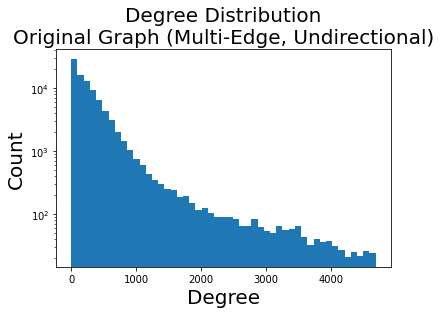

Original Graph (Multi-Edge, Undirectional) in distribution can't be graphed
Original Graph (Multi-Edge, Undirectional) out distribution can't be graphed
Working on Largest component
Stats for Original Graph (Multi-Edge, Undirectional)
Largest Component
Number of Nodes = 91,235
Number of Edges = 16,303,198
Original Graph (Multi-Edge, Undirectional)
Largest Component in_and_out degree distribution mean = 325.9930269448545,
Original Graph (Multi-Edge, Undirectional)
Largest Component in_and_out degree distribution median = 199.0


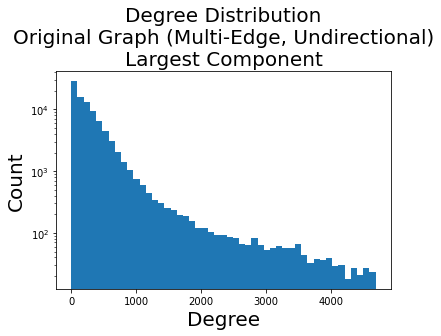

Original Graph (Multi-Edge, Undirectional)
Largest Component in distribution can't be graphed
Original Graph (Multi-Edge, Undirectional)
Largest Component out distribution can't be graphed


In [12]:
graph_title = "Original Graph (Multi-Edge, Undirectional)"
G_orig_multi_stats = ga.graph_analysis_basic_with_components(G=G_orig_multi,
                        graph_title = graph_title,
                        verbose = True,
                        plot_distributions = True,
                        degree_distribution_percentile=99.5)

# Origianl Graph For just directional graph

Stats for Original Graph (Unique-Edge, Directional)
Number of Nodes = 91,565
Number of Edges = 11,917,994
Original Graph (Unique-Edge, Directional) in_and_out degree distribution mean = 243.64163017111747,
Original Graph (Unique-Edge, Directional) in_and_out degree distribution median = 160.0


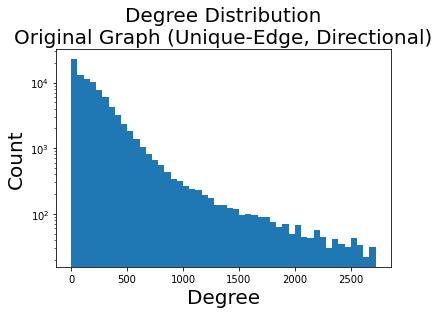

Original Graph (Unique-Edge, Directional) in degree distribution mean = 124.54332506421373,
Original Graph (Unique-Edge, Directional) in degree distribution median = 97.0


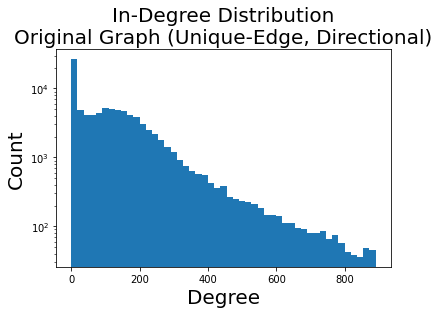

Original Graph (Unique-Edge, Directional) out degree distribution mean = 117.05349753586442,
Original Graph (Unique-Edge, Directional) out degree distribution median = 50.0


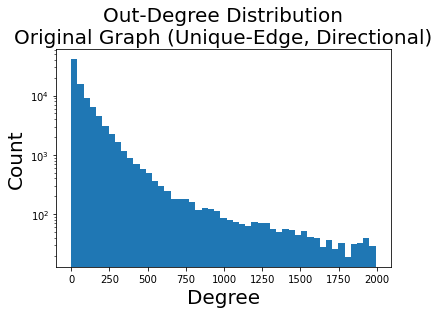

Cant perform connected component analysis


In [13]:
G_orig_di = nx.DiGraph(G_orig_multi_di)
graph_title = "Original Graph (Unique-Edge, Directional)"
G_orig_di_stats = ga.graph_analysis_basic_with_components(G=G_orig_di,
                        graph_title = graph_title)

# Original Graph but undirected non-multi-edge (simple)

In [14]:
G_orig = nx.Graph(G_orig_multi_di)

Stats for Original Graph Simple (Unique-Edge, Undirectional)
Number of Nodes = 91,565
Number of Edges = 11,482,430
Original Graph Simple (Unique-Edge, Undirectional) in_and_out degree distribution mean = 235.5293555928743,
Original Graph Simple (Unique-Edge, Undirectional) in_and_out degree distribution median = 158.0


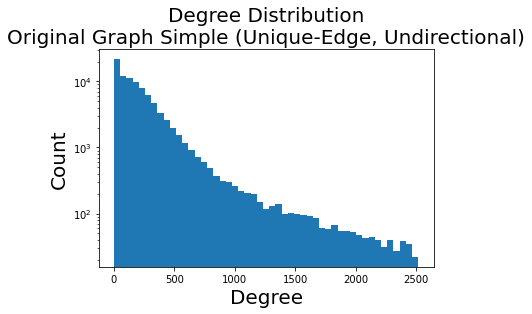

Original Graph Simple (Unique-Edge, Undirectional) in distribution can't be graphed
Original Graph Simple (Unique-Edge, Undirectional) out distribution can't be graphed
Working on Largest component
Stats for Original Graph Simple (Unique-Edge, Undirectional)
Largest Component
Number of Nodes = 91,235
Number of Edges = 11,482,236
Original Graph Simple (Unique-Edge, Undirectional)
Largest Component in_and_out degree distribution mean = 236.40644208949305,
Original Graph Simple (Unique-Edge, Undirectional)
Largest Component in_and_out degree distribution median = 159.0


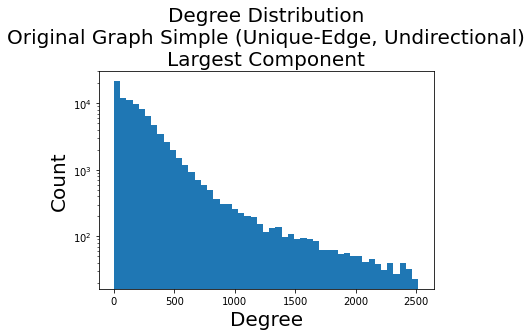

Original Graph Simple (Unique-Edge, Undirectional)
Largest Component in distribution can't be graphed
Original Graph Simple (Unique-Edge, Undirectional)
Largest Component out distribution can't be graphed


In [15]:
graph_title = "Original Graph Simple (Unique-Edge, Undirectional)"
G_orig_stats = ga.graph_analysis_basic_with_components(G=G_orig,
                        graph_title = graph_title,
                        verbose = True,
                        plot_distributions = True,
                        degree_distribution_percentile=99.5)

# Pull Down the Proofread Graph

In [70]:
direct_conn_df_path = Path("/neuron_mesh_tools/Graph_Analysis/direct_conn_df.pbz2")

In [72]:
if direct_conn_df_path.exists():
    print(f"Loading saved off direction connections path")
    direct_conn_df = su.decompress_pickle(direct_conn_df_path)
else:
    print(f"Downloading direct connections")
    direct_conn_df = du.fetch_proofread_direct_connections_df()
    su.compressed_pickle(direct_conn_df,direct_conn_df_path)

Saved object at /neuron_mesh_tools/Graph_Analysis/direct_conn_df.pbz2
File size is 32.672433 MB


In [73]:
G_proof_multi_di = ga.direct_conn_df_to_G(direct_conn_df)

  0%|          | 0/1455366 [00:00<?, ?it/s]

# Running the preliminary graph analysis on the proofread graph

Stats for Proofread Graph (Multi-Edge,Diretional)
Number of Nodes = 69,516
Number of Edges = 1,455,366
Proofread Graph (Multi-Edge,Diretional) in_and_out degree distribution mean = 36.02467975594946,
Proofread Graph (Multi-Edge,Diretional) in_and_out degree distribution median = 20.0


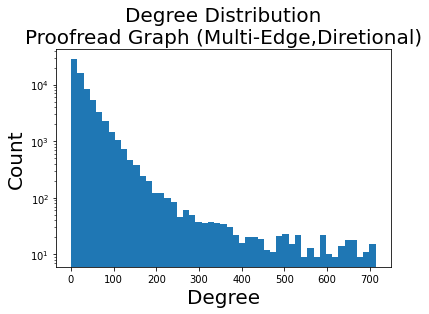

Proofread Graph (Multi-Edge,Diretional) in degree distribution mean = 19.954623671462656,
Proofread Graph (Multi-Edge,Diretional) in degree distribution median = 14.0


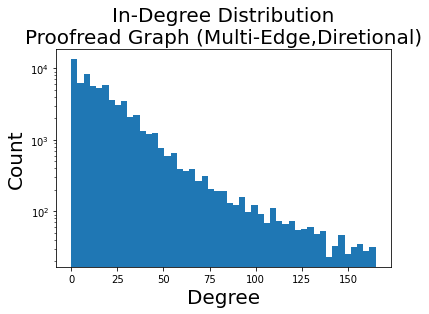

Proofread Graph (Multi-Edge,Diretional) out degree distribution mean = 15.53835588711543,
Proofread Graph (Multi-Edge,Diretional) out degree distribution median = 1.0


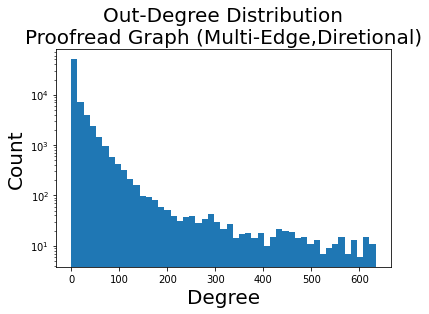

Cant perform connected component analysis


In [94]:
graph_title = "Proofread Graph (Multi-Edge,Diretional)"
G_proof_multi_di_stats = ga.graph_analysis_basic_with_components(G=G_proof_multi_di,
                        graph_title = graph_title,
                        verbose = True,
                        plot_distributions = True,
                        degree_distribution_percentile=99.5)

Stats for Proofread Graph (Multi-Edge,Undiretional)
Number of Nodes = 69,516
Number of Edges = 1,435,422
Proofread Graph (Multi-Edge,Undiretional) in_and_out degree distribution mean = 35.62930299131089,
Proofread Graph (Multi-Edge,Undiretional) in_and_out degree distribution median = 20.0


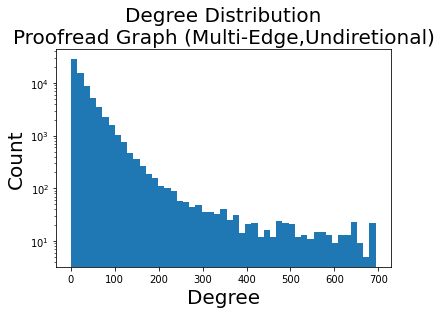

Proofread Graph (Multi-Edge,Undiretional) in distribution can't be graphed
Proofread Graph (Multi-Edge,Undiretional) out distribution can't be graphed
Working on Largest component
Stats for Proofread Graph (Multi-Edge,Undiretional)
Largest Component
Number of Nodes = 69,245
Number of Edges = 1,435,240
Proofread Graph (Multi-Edge,Undiretional)
Largest Component in_and_out degree distribution mean = 35.78336091033121,
Proofread Graph (Multi-Edge,Undiretional)
Largest Component in_and_out degree distribution median = 20.0


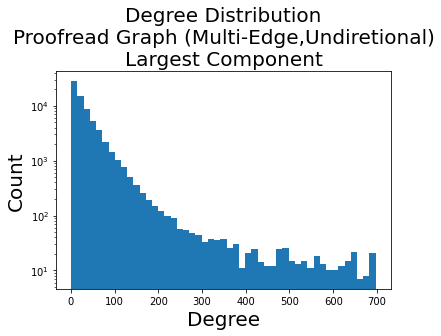

Proofread Graph (Multi-Edge,Undiretional)
Largest Component in distribution can't be graphed
Proofread Graph (Multi-Edge,Undiretional)
Largest Component out distribution can't be graphed


In [75]:
# The multi edge
G_proof_multi = nx.MultiGraph(G_proof_multi_di)
graph_title = "Proofread Graph (Multi-Edge,Undiretional)"
G_proof_multi_stats = ga.graph_analysis_basic_with_components(G=G_proof_multi,
                        graph_title = graph_title)

Stats for Proofread Graph (Unique-Edge,Diretional)
Number of Nodes = 69,516
Number of Edges = 1,098,615
Proofread Graph (Unique-Edge,Diretional) in_and_out degree distribution mean = 28.23691591487393,
Proofread Graph (Unique-Edge,Diretional) in_and_out degree distribution median = 16.0


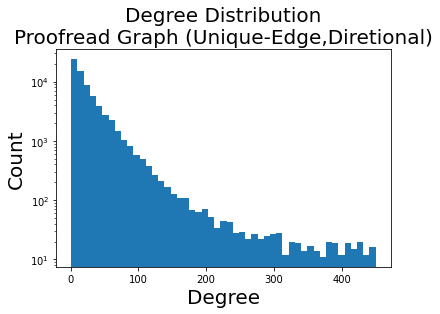

Proofread Graph (Unique-Edge,Diretional) in degree distribution mean = 15.07108668932109,
Proofread Graph (Unique-Edge,Diretional) in degree distribution median = 11.0


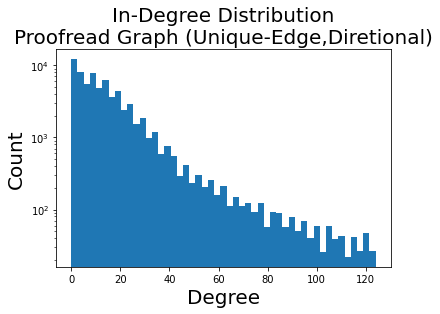

Proofread Graph (Unique-Edge,Diretional) out degree distribution mean = 12.769734559333797,
Proofread Graph (Unique-Edge,Diretional) out degree distribution median = 1.0


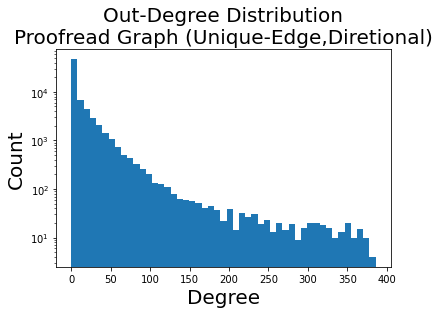

Cant perform connected component analysis


In [76]:
# The directional edge
G_proof_di = nx.DiGraph(G_proof_multi_di)
graph_title = "Proofread Graph (Unique-Edge,Directional)"
G_proof_di_stats = ga.graph_analysis_basic_with_components(G=G_proof_di,
                        graph_title = graph_title)

Stats for Proofread Graph Simple (Unique-Edge,Undiretional)
Number of Nodes = 69,516
Number of Edges = 1,085,917
Proofread Graph Simple (Unique-Edge,Undiretional) in_and_out degree distribution mean = 27.97245836224844,
Proofread Graph Simple (Unique-Edge,Undiretional) in_and_out degree distribution median = 16.0


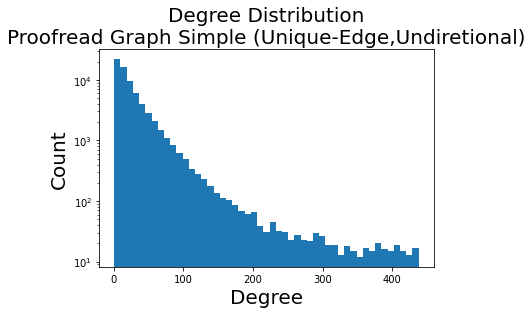

Proofread Graph Simple (Unique-Edge,Undiretional) in distribution can't be graphed
Proofread Graph Simple (Unique-Edge,Undiretional) out distribution can't be graphed
Working on Largest component
Stats for Proofread Graph Simple (Unique-Edge,Undiretional)
Largest Component
Number of Nodes = 69,245
Number of Edges = 1,085,772
Proofread Graph Simple (Unique-Edge,Undiretional)
Largest Component in_and_out degree distribution mean = 28.078276267471733,
Proofread Graph Simple (Unique-Edge,Undiretional)
Largest Component in_and_out degree distribution median = 16.0


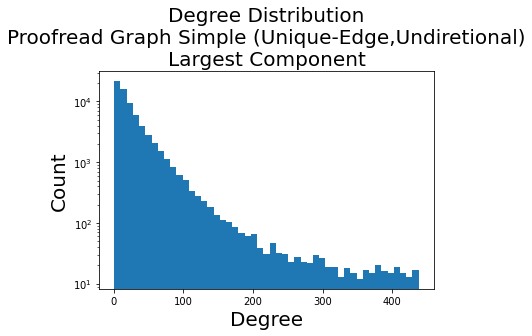

Proofread Graph Simple (Unique-Edge,Undiretional)
Largest Component in distribution can't be graphed
Proofread Graph Simple (Unique-Edge,Undiretional)
Largest Component out distribution can't be graphed


In [77]:
# The simple graph
G_proof = nx.Graph(G_proof_multi_di)
graph_title = "Proofread Graph Simple (Unique-Edge,Undiretional)"
G_proof_stats = ga.graph_analysis_basic_with_components(G=G_proof,
                        graph_title = graph_title)

# Adding on the features to the multi-proofread graph

In [82]:
import microns_utils as mru
G_proof_multi_di_with_attributes = mru.add_node_attributes_to_proofread_graph(G_proof_multi_di)
#G_proof_multi_di_with_attributes.nodes[70295.0]

In [87]:
# saving off the graph
proof_graph_path = Path("/neuron_mesh_tools/Graph_Analysis/G_proof_v3_multi_di_with_attributes.pbz2")
su.compressed_pickle(G_proof_multi_di_with_attributes,proof_graph_path)

Saved object at /neuron_mesh_tools/Graph_Analysis/G_proof_v3_multi_di_with_attributes.pbz2
File size is 90.374432 MB


# Reducing the Graph to 2 more subgroups (excitatory, long axon excitatory)

# excitatory

In [ ]:
import networkx_utils as xu
excitatory_nodes = xu.get_nodes_with_attributes_dict(G_proof_multi_di_with_attributes,
                                 dict(cell_type_predicted="excitatory"))
G_proof_multi_di_exc = G_proof_multi_di.subgraph(excitatory_nodes)
G_proof_multi_di_exc

In [91]:
G_proof_multi_di_with_attributes.nodes[36372.0]

{'cell_type_predicted': 'excitatory',
 'spine_category': 'densely_spined',
 'n_axons': 1,
 'n_apicals': 1,
 'axon_length': 219.9475554472058,
 'nucleus_id': 36372,
 'soma_x': 76318,
 'soma_y': 177620,
 'soma_z': 20080,
 'skeletal_length': 1078245.148148135,
 'n_spines': 287,
 'visual_area': 'V1',
 'layer': 'L5'}



---- Working on graph type multi_di ----- 


Stats for Proofread Graph (Multi-Edge,Diretional)
Number of Nodes = 59,025
Number of Edges = 554,820
Proofread Graph (Multi-Edge,Diretional) in_and_out degree distribution mean = 16.855693098809788,
Proofread Graph (Multi-Edge,Diretional) in_and_out degree distribution median = 8.0


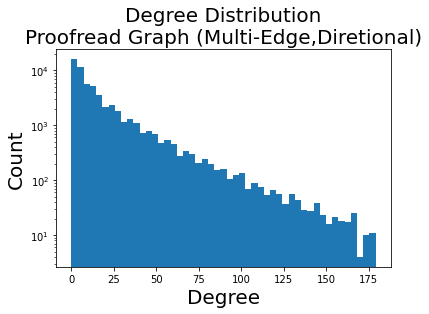

Proofread Graph (Multi-Edge,Diretional) in degree distribution mean = 8.668284293692958,
Proofread Graph (Multi-Edge,Diretional) in degree distribution median = 5.0


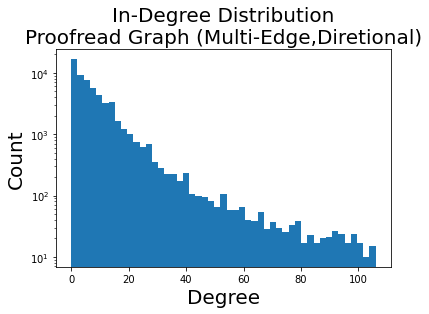

Proofread Graph (Multi-Edge,Diretional) out degree distribution mean = 7.646505925623212,
Proofread Graph (Multi-Edge,Diretional) out degree distribution median = 0.0


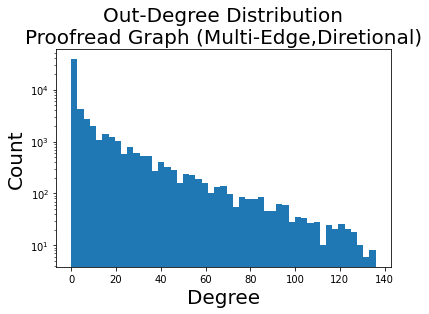

Cant perform connected component analysis


---- Working on graph type multi ----- 


Stats for Proofread Graph (Multi-Edge,Undiretional)
Number of Nodes = 59,025
Number of Edges = 552,586
Proofread Graph (Multi-Edge,Undiretional) in_and_out degree distribution mean = 16.806562569176016,
Proofread Graph (Multi-Edge,Undiretional) in_and_out degree distribution median = 8.0


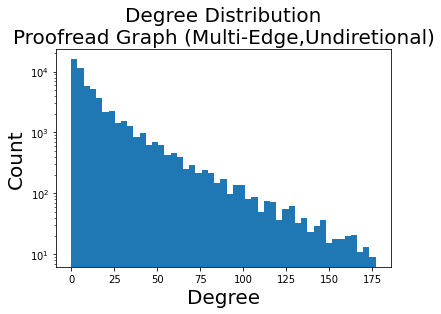

Proofread Graph (Multi-Edge,Undiretional) in distribution can't be graphed
Proofread Graph (Multi-Edge,Undiretional) out distribution can't be graphed
Working on Largest component
Stats for Proofread Graph (Multi-Edge,Undiretional)
Largest Component
Number of Nodes = 55,309
Number of Edges = 552,428
Proofread Graph (Multi-Edge,Undiretional)
Largest Component in_and_out degree distribution mean = 17.9953662481147,
Proofread Graph (Multi-Edge,Undiretional)
Largest Component in_and_out degree distribution median = 9.0


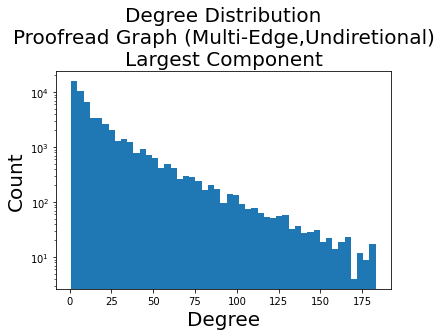

Proofread Graph (Multi-Edge,Undiretional)
Largest Component in distribution can't be graphed
Proofread Graph (Multi-Edge,Undiretional)
Largest Component out distribution can't be graphed


---- Working on graph type di ----- 


Stats for Proofread Graph (Unique-Edge,Diretional)
Number of Nodes = 59,025
Number of Edges = 472,172
Proofread Graph (Unique-Edge,Diretional) in_and_out degree distribution mean = 14.711410424506616,
Proofread Graph (Unique-Edge,Diretional) in_and_out degree distribution median = 7.0


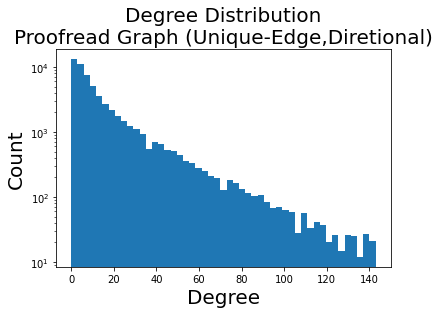

Proofread Graph (Unique-Edge,Diretional) in degree distribution mean = 7.419319130094177,
Proofread Graph (Unique-Edge,Diretional) in degree distribution median = 5.0


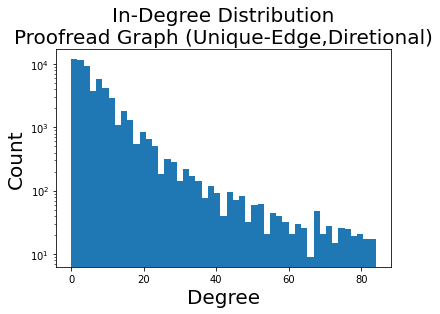

Proofread Graph (Unique-Edge,Diretional) out degree distribution mean = 6.843263123840011,
Proofread Graph (Unique-Edge,Diretional) out degree distribution median = 0.0


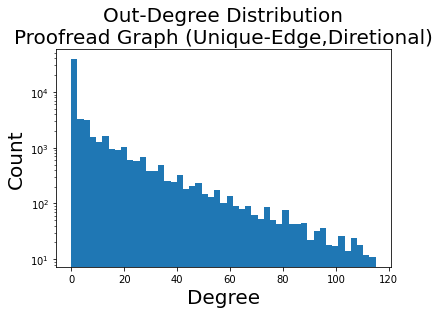

Cant perform connected component analysis


---- Working on graph type simple ----- 


Stats for Proofread Graph (Unique-Edge,Undiretional)
Number of Nodes = 59,025
Number of Edges = 470,684
Proofread Graph (Unique-Edge,Undiretional) in_and_out degree distribution mean = 14.682434273259775,
Proofread Graph (Unique-Edge,Undiretional) in_and_out degree distribution median = 7.0


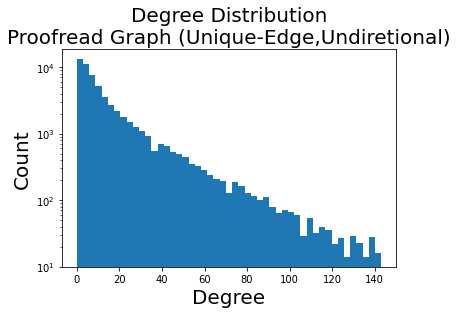

Proofread Graph (Unique-Edge,Undiretional) in distribution can't be graphed
Proofread Graph (Unique-Edge,Undiretional) out distribution can't be graphed
Working on Largest component
Stats for Proofread Graph (Unique-Edge,Undiretional)
Largest Component
Number of Nodes = 55,309
Number of Edges = 470,537
Proofread Graph (Unique-Edge,Undiretional)
Largest Component in_and_out degree distribution mean = 15.704163410689297,
Proofread Graph (Unique-Edge,Undiretional)
Largest Component in_and_out degree distribution median = 8.0


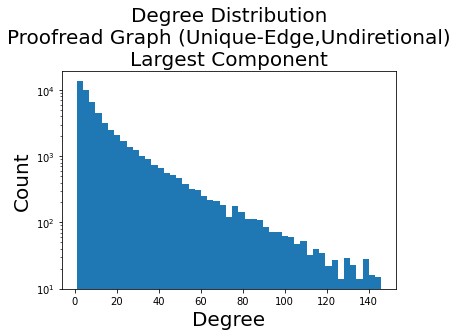

Proofread Graph (Unique-Edge,Undiretional)
Largest Component in distribution can't be graphed
Proofread Graph (Unique-Edge,Undiretional)
Largest Component out distribution can't be graphed


In [97]:
excitatory_stats = ga.graph_analysis_different_graph_types(G = G_proof_multi_di_exc,
title_append = "Excitatory Neurons")

# Getting the statistics on the graph

In [ ]:
large_axon_nuclei = (du.proofreading_neurons_table() & "axon_length>1000").fetch("nucleus_id")
large_axon_nuclei.shape
large_axon_subgraph = G.subgraph(large_axon_nuclei)


In [ ]:
gu.plot_degree_distribution(large_axon_subgraph,logscale=True,n_bins = 100,percentile=99,
                           font_size=18,
                           title="Degree Distribution v3 \n Neurons with Axon Length > 1000")

In [ ]:
print(f"""
Graph Statistics:

Within the Direct Connection Graph
1) {len(G.nodes())} Nodes
2) {len(G.edges())} Direct Connections
3) {len(large_axon_subgraph.nodes())} Nodes with Axon Skeletal Length > 1000
4) {len(large_axon_subgraph.edges())} Direct Connections between Nodes with Axon Skeletal Length > 1000

""")

In [ ]:
excitatory_nuclei = (du.proofreading_neurons_table() & dict(spine_category = "densely_spined")).fetch("nucleus_id")
excitatory_nuclei
G_exc = G.subgraph(excitatory_nuclei)
large_axon_nuclei_exc =  (du.proofreading_neurons_table() & dict(spine_category = "densely_spined")
                                             & "axon_length>1000").fetch("nucleus_id")
large_axon_subgraph_exc = G.subgraph(large_axon_nuclei_exc)
                              

In [ ]:
minnie.AutoProofreadNeurons3()

In [ ]:
print(f"""
Graph Statistics:

* For an all densely spined excitatory graph *
Within the Direct Connection Graph
1) {len(G_exc.nodes())} Nodes
2) {len(G_exc.edges())} Direct Connections
3) {len(large_axon_subgraph_exc.nodes())} Nodes with Axon Skeletal Length > 1000
4) {len(large_axon_subgraph_exc.edges())} Direct Connections between Nodes with Axon Skeletal Length > 1000

""")

In [ ]:
curr_graph = orig_G

print(f"""
Graph Statistics:

* For an all densely spined excitatory graph *
Within the Direct Connection Graph
1) {len(orig_G.nodes())} Nodes
2) {len(orig_G.edges())} Direct Connections
3) {len(G_undirected_orig)}: Undirected, non-multi_edge Direct Connections

""")

In [ ]:
orig_G = nx.MultiDiGraph()
orig_G.add_edges_from(original_edges)
print(len(orig_G.nodes()),len(orig_G.edges()))

G_undirected_orig = nx.Graph(orig_G)
print(len(G_undirected_orig.nodes()),len(G_undirected_orig.edges()))

In [ ]:
"""
Steps for Decomposition:

Preprocessing:
1) Auto Glia and Nuclei Removal

Decomposition:
1) Find Soma
2) Divide into Soma and Branches
3) Skeletonize All Branches
4) Create Concept Graphs of all Limbs
5) Automatic Spine Detection, Width calculation

Proofreading:
6) Split Multi-Nuclei Cells
7) Axon and Apical Identification
8) Excitatory/Inhibitory Classification
9) E/I based mesh filtering away
10) Synapse Filtering based on mesh filtering away




"""

# Table that will compute the graph stats

# Degree Distribution

In [ ]:
undirectional_graph = nx.Graph(G_largest)
no_selflooped_graph = xu.remove_selfloops(undirectional_graph)
no_selflooped_graph

In [ ]:
degree_distribution = np.array(xu.get_node_degree(no_selflooped_graph,node_names_largest_comp))
degree_distribution_filtered = degree_distribution[degree_distribution<np.percentile(degree_distribution,99.5)]

In [ ]:
print(f"Average Degree of Node: {np.mean(degree_distribution_filtered)}")
print(f"Median Degree of Node: {np.median(degree_distribution_filtered)}")

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(degree_distribution_filtered,bins=50,density=True)
ax.set_title("Degree Distribution of Neurons \n Unique Edges, No Self Loops")
ax.set_xlabel("Degree of Neuron")
ax.set_ylabel("Density")
plt.show()

# Degree Distribution In and Out

In [ ]:
np.sum(degree_distribution(G,degree_type="in")),np.sum(degree_distribution(G,degree_type="out"))

In [ ]:
np.sum(degree_distribution(G,degree_type="in_and_out"))

In [ ]:
import graph_analysis as ga
import graph_visualizations as gviz

In [ ]:
from importlib import reload
gviz = reload(gviz)

In [ ]:
in_degree = np.array(list(dict(G.in_degree()).values()))
in_degree

In [ ]:
import matplotlib.pyplot as plt
import matplotlib_utils as mu

import numpy as np

mu.histogram(in_degree,bin_max = 700,
         bin_width = 10,return_fig_ax=True,logscale=True)

In [ ]:
ga.degree_distribution(G,
                                                       degree_type="in",
                                                       percentile=95)

In [ ]:
gviz.plot_degree_distribution(G,degree_type="in",
                             percentile=100,
                              bin_width = 10,
                              bin_max = 600,
                             )

In [ ]:
gviz.plot_degree_distribution(G,degree_type="out",
                             percentile=100,
                              bin_width = 10,
                              bin_max = 600,
                             )

In [ ]:
gviz.plot_degree_distribution(G,degree_type="in",
                         bin_width=5,
                         bin_max = 800,
                        percentile=99)

In [ ]:
gviz.plot_degree_distribution(G,degree_type="out",
                         bin_width=5,
                         bin_max = 800,
                        percentile=99)

In [ ]:
gviz.plot_degree_distribution(G,degree_type="in",title="In-Degree Distribution",
                         bin_width=5,
                         bin_max = 500,
                        percentile=99)

In [ ]:
plot_degree_distribution(G,degree_type="out",title="Out-Degree Distribution",
                        percentile=99)

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(degree_distribution_filtered,bins=50,density=False)
ax.set_title("Degree Distribution of Neurons \n Unique Edges, No Self Loops")
ax.set_xlabel("Degree of Neuron")
ax.set_ylabel("Count")
ax.set_yscale("log")
plt.show()

# Getting the Soma to Soma Distance

In [ ]:
"""
Psuedoode: Pull down the Nucleus IDs and Nucleus Centers

1) Get the nucleus ids and centers
2) Adjust the centers for nm


"""

nuc_table = du.configure_nucleus_table() & "segment_id>0"
nuc_table

In [ ]:
nucleu_ids,nuc_x,nuc_y,nuc_z = nuc_table.fetch("nucleus_id","nucleus_x","nucleus_y","nucleus_z")

In [ ]:
nucleus_centers = np.vstack([nuc_x,nuc_y,nuc_z]).T * [4,4,40]
nucleus_centers

In [ ]:
nuc_id_to_center = dict([(k,v) for k,v in zip(nucleu_ids,nucleus_centers)])

In [ ]:
len(G_undirected_non_multi.edges())

In [ ]:
print("hi")

In [ ]:
import matplotlib.pyplot as plt
def graph_to_soma_to_soma_distance(G):
    total_unique_edges = np.array(list(G.edges()))
    edges_mask = np.all(total_unique_edges>0,axis=1)
    soma_distances = np.array([[nuc_id_to_center[k],nuc_id_to_center[v]] for k,v in total_unique_edges[edges_mask]])
    soma_distances_norm = np.linalg.norm(soma_distances[:,0,:] - soma_distances[:,1,:],axis=1)

    
    fig,ax = plt.subplots(1,1)
    ax.hist(soma_distances_norm/1000,bins=100,density=False)
    ax.set_title("Soma to Soma Distance of Unique Direct Connections \n After Auto Proofreading")
    ax.set_xlabel("Soma to Soma Distance (um)")
    ax.set_ylabel("Counts")
    plt.yscale("log")
    plt.xscale("linear")
    plt.show()

graph_to_soma_to_soma_distance(G)

In [ ]:
graph_to_soma_to_soma_distance(G_undirected_non_multi)

In [ ]:
total_unique_edges = np.array(list(G_undirected_non_multi.edges()))


In [ ]:
edges_mask = np.all(total_unique_edges>0,axis=1)
edges_mask

In [ ]:
soma_distances = np.array([[nuc_id_to_center[k],nuc_id_to_center[v]] for k,v in total_unique_edges[edges_mask]])
soma_distances

In [ ]:
soma_distances.shape

In [ ]:
soma_distances_norm = np.linalg.norm(soma_distances[:,0,:] - soma_distances[:,1,:],axis=1)
soma_distances_norm.shape

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.hist(soma_distances_norm/1000,bins=100,density=False)
ax.set_title("Soma to Soma Distance of Unique Direct Connections \n After Auto Proofreading")
ax.set_xlabel("Soma to Soma Distance (um)")
ax.set_ylabel("Counts")
plt.yscale("log")
plt.xscale("linear")
plt.show()

In [ ]:
alpha_level = 0.7

import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.hist(total_distances_no_self_loops/1000,bins=100,density=False,color="blue",label="Before Auto Proofreading",alpha=alpha_level)
ax.hist(total_distances_no_self_loops_auto/1000,bins=100,density=False,color="red",label="After Auto Proofreading",alpha=alpha_level)
ax.set_title("Soma to Soma Distance of Direct Connections")
ax.set_xlabel("Soma to Soma Distance (um)")
ax.set_ylabel("Counts")

ax.set_yscale("log")
ax.set_xscale("linear")
ax.legend()
plt.show()